In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle

# Importing the datasets
df=pd.read_excel('dataset/HousePricePrediction.xlsx')

print(df.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
# Categorizing the features
obj=(df.dtypes == 'object')
object_cols=list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_=(df.dtypes == 'int')
num_cols= list(int_[int_].index)
print("Integer variables:",len(num_cols))

float_=(df.dtypes=='float')
fl_cols=list(float_[float_].index)
print("Float variables:",len(fl_cols))
df.shape

Categorical variables: 4
Integer variables: 6
Float variables: 3


(2919, 13)

### Exploratory Data Analysis

<Axes: >

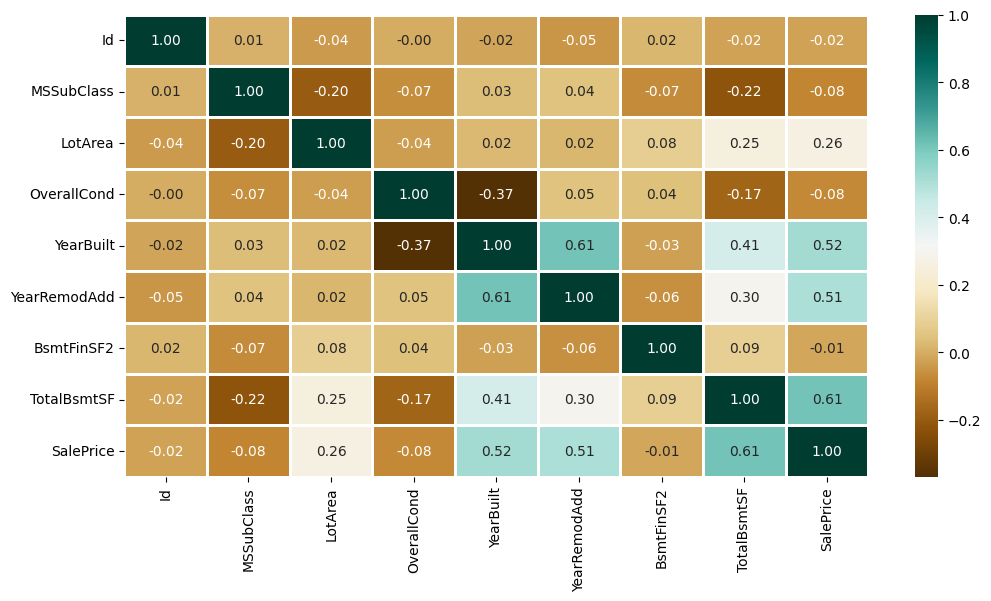

In [4]:
# Correlation between numerical features
numerical_dataset=df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

#### Categorical Features

<Axes: title={'center': 'No.of Unique Values of Categorical Feature'}>

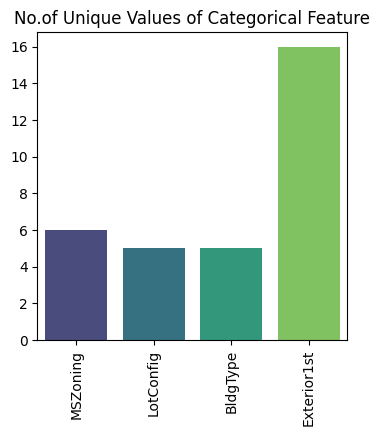

In [5]:
unique_values=[]
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(4,4))
plt.title('No.of Unique Values of Categorical Feature')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values, palette='viridis', hue=object_cols)


Index(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype='object', name='MSZoning')
Index(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], dtype='object', name='LotConfig')
Index(['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'], dtype='object', name='BldgType')
Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CemntBd',
       'BrkFace', 'WdShing', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'],
      dtype='object', name='Exterior1st')


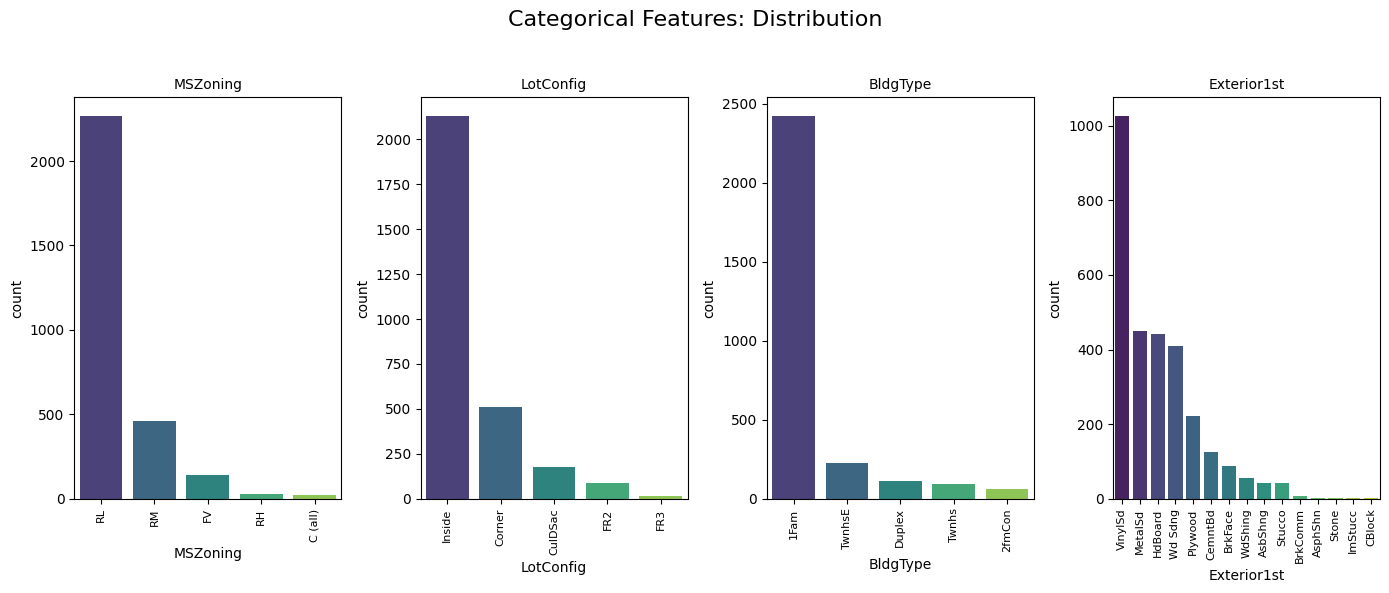

In [ ]:
plt.figure(figsize=(14, 6))  # Increase the figure size for better clarity
plt.suptitle('Categorical Features: Distribution', fontsize=16)  # Add a main title

# Loop through categorical columns
for index, col in enumerate(object_cols, start=1):
    plt.subplot((len(object_cols) + 3) // 4, 4, index)  # Dynamic grid layout
    y = df[col].value_counts()
    sns.barplot(x=y.index, y=y, palette='viridis', hue=y.index)
    plt.title(col, fontsize=10)  # Set title for each subplot
    plt.xticks(rotation=90, fontsize=8)  # Adjust rotation and font size
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Avoid overlap with the main title

plt.show()


### Data Cleaning

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [8]:
df.drop(['Id'],axis=1,inplace=True)

df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].mean())

df=df.dropna()

In [9]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### One Hot Encoder - For Label Categorical Features 

In [10]:
from sklearn.preprocessing import OneHotEncoder

s=(df.dtypes == 'object')
obj_col= list(s[s].index)
print("Categorical variables:")
print(obj_col)
print('No. of. categorical features: ', 
      len(obj_col))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_encoded=encoder.fit_transform(df[obj_col])

one_hot_df=pd.DataFrame(one_hot_encoded)
one_hot_df.index=df.index
one_hot_df.columns=encoder.get_feature_names_out()
df_encoded=pd.concat([df,one_hot_df], axis=1)
df_encoded = df_encoded.drop(obj_col, axis=1)
df_encoded


['MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM' 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2'
 'LotConfig_FR3' 'LotConfig_Inside' 'BldgType_1Fam' 'BldgType_2fmCon'
 'BldgType_Duplex' 'BldgType_Twnhs' 'BldgType_TwnhsE'
 'Exterior1st_AsbShng' 'Exterior1st_AsphShn' 'Exterior1st_BrkComm'
 'Exterior1st_BrkFace' 'Exterior1st_CBlock' 'Exterior1st_CemntBd'
 'Exterior1st_HdBoard' 'Exterior1st_ImStucc' 'Exterior1st_MetalSd'
 'Exterior1st_Plywood' 'Exterior1st_Stone' 'Exterior1st_Stucco'
 'Exterior1st_VinylSd' 'Exterior1st_Wd Sdng' 'Exterior1st_WdShing']


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

X=df_encoded.drop(['SalePrice'],axis=1)
y=df_encoded['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.8,random_state=42
)

In [13]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

model_SVR=svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred=model_SVR.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_percentage_error(y_test,y_pred)}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.20686498946192633
R² Score: -0.00


### Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X=df_encoded.drop(['SalePrice'],axis=1)
y=df_encoded['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.8,random_state=42
)
model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,y_train)
y_pred=model_RFR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_percentage_error(y_test,y_pred)}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.2088391171002984
R² Score: 0.34


### Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X=df_encoded.drop(['SalePrice'],axis=1)
y=df_encoded['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.8,random_state=42
)
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.2088391171002984
R² Score: 0.34


In [17]:
filename='file.pkl'
pickle.dump(model_LR,open(filename,'wb'))
encoderfile='encod.pkl'
pickle.dump(encoder,open(encoderfile,'wb'))